In [37]:
# This program is based on the Udemy course "Python for Finance: Investment Fundamentals & Data Analytics" 
# by Martin and Ned from 365
# Link to the course: https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/
# This is a jupyter notebook file, better to run in jupyter notebook enviorment.
# Author: Martin and Ned, 365 Team. 
# Updated by: Kuo L. 2022-02-01
# Use this script to compare expected performance with actual performance with 3 year increments.

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# It uses yahoo finance api to get close price for each ticker stock/ETF.
# use any 3 tickers, I just use vanguard ETFs.
# you can put more than 3 tickers, just note that the more tickers in, 
# the more calculation needed to plot efficient frontier. change num_simulation to a higher number as needed.

num_simulation = 3000
assets = ['COST', 'VUG', 'VOO','CMCSA','AAPL', 'VTI', 'VYM']
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2019-1-1', end = '2022-1-1')['Adj Close'] 

In [39]:
pf_data.head() #makre sure companies were public at starting date

,COST,VUG,VOO,CMCSA,AAPL,VTI,VYM
Date,,,,,,,
2019-01-02,194.445038,131.077316,218.244247,32.375896,38.326290,121.519745,70.912552
2019-01-03,190.323669,127.065651,213.034592,32.630226,34.508709,118.703667,69.623573
2019-01-04,195.850479,132.121689,220.066162,33.732349,35.981865,122.632843,71.647812
2019-01-07,196.572189,133.468689,221.717300,33.374390,35.901775,123.869659,71.992752
2019-01-08,198.044113,135.098770,223.871368,33.647568,36.586170,125.144501,72.582787


In [40]:
pf_data.tail() #check companies still open and public at ending date

,COST,VUG,VOO,CMCSA,AAPL,VTI,VYM
Date,,,,,,,
2021-12-27,563.469971,325.089996,438.809998,50.221329,180.330002,242.960007,111.690002
2021-12-28,564.640015,323.640015,438.480011,50.261131,179.289993,242.460007,111.940002
2021-12-29,567.770020,323.760010,439.010010,50.340736,179.380005,242.600006,112.160004
2021-12-30,563.909973,322.480011,437.769989,50.340736,178.199997,242.210007,111.970001
2021-12-31,567.700012,320.899994,436.570007,50.082020,177.570007,241.440002,112.110001


<AxesSubplot:xlabel='Date'>

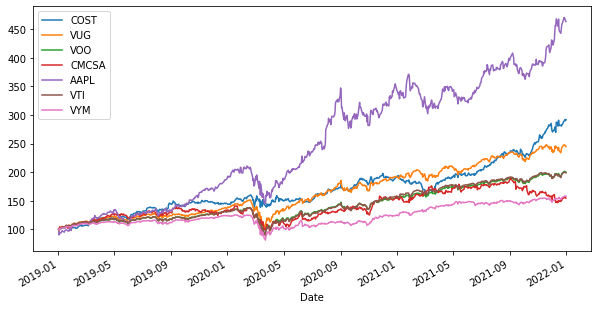

In [41]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [42]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [43]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

COST     0.354313
VUG      0.296079
VOO      0.229277
CMCSA    0.144262
AAPL     0.507020
VTI      0.227032
VYM      0.151466
dtype: float64

In [44]:
log_returns.cov() * 250 #get coveriance between each pair.

,COST,VUG,VOO,CMCSA,AAPL,VTI,VYM
COST,0.047826,0.034834,0.031222,0.028536,0.042815,0.030274,0.026787
VUG,0.034834,0.058434,0.051822,0.042955,0.069865,0.051989,0.042771
VOO,0.031222,0.051822,0.050417,0.044523,0.059868,0.050428,0.046485
CMCSA,0.028536,0.042955,0.044523,0.079930,0.046222,0.044397,0.044626
AAPL,0.042815,0.069865,0.059868,0.046222,0.115805,0.059248,0.046548
VTI,0.030274,0.051989,0.050428,0.044397,0.059248,0.050907,0.046477
VYM,0.026787,0.042771,0.046485,0.044626,0.046548,0.046477,0.048473


In [45]:
log_returns.corr() #get correlation between each pair.

,COST,VUG,VOO,CMCSA,AAPL,VTI,VYM
COST,1.000000,0.658919,0.635833,0.461531,0.575304,0.613550,0.556346
VUG,0.658919,1.000000,0.954752,0.628534,0.849302,0.953201,0.803656
VOO,0.635833,0.954752,1.000000,0.701358,0.783504,0.995378,0.940310
CMCSA,0.461531,0.628534,0.701358,1.000000,0.480427,0.696000,0.716945
AAPL,0.575304,0.849302,0.783504,0.480427,1.000000,0.771648,0.621285
VTI,0.613550,0.953201,0.995378,0.696000,0.771648,1.000000,0.935612
VYM,0.556346,0.803656,0.940310,0.716945,0.621285,0.935612,1.000000


***

In [46]:
num_assets = len(assets)
pfolio_returns = []
pfolio_volatilities = []

w_lst = []

for i in range(num_assets):
    w_lst.append([])

# Followig generate the simulation
for x in range (num_simulation):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    for i in range(num_assets):
        w_lst[i].append(weights[i])

    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

for i in range(num_assets):
    w_lst[i] = np.array(w_lst[i])

# pfolio_returns, pfolio_volatilities, w_lst[0], w_lst[1], w_lst[2]

In [47]:
# build simulated portfolios.
df_build = {'Return': pfolio_returns, 'Volatility': pfolio_volatilities}
for w in range(num_assets):
    df_build[assets[w]] = w_lst[w]
portfolios = pd.DataFrame(df_build)

In [48]:
portfolios.head() #checking to see if any error

,Return,Volatility,COST,VUG,VOO,CMCSA,AAPL,VTI,VYM
0,0.314489,0.232708,0.111728,0.176745,0.068645,0.010062,0.236134,0.338415,0.058271
1,0.286945,0.233381,0.026709,0.109423,0.126261,0.055557,0.251351,0.204372,0.226327
2,0.269472,0.213776,0.201505,0.171133,0.117322,0.191783,0.095491,0.141381,0.081385
3,0.305542,0.226218,0.145186,0.351810,0.149449,0.079792,0.166213,0.047613,0.059937
4,0.231023,0.219669,0.034722,0.340049,0.094275,0.162430,0.007170,0.193524,0.167830


In [49]:
portfolios.tail() #checking to see if any error

,Return,Volatility,COST,VUG,VOO,CMCSA,AAPL,VTI,VYM
2995,0.314269,0.220969,0.261873,0.158481,0.015460,0.176020,0.238889,0.025029,0.124249
2996,0.280588,0.222408,0.122584,0.137519,0.169806,0.142863,0.173348,0.139618,0.114260
2997,0.250149,0.206694,0.211154,0.204766,0.073560,0.062677,0.007755,0.240980,0.199107
2998,0.307824,0.238245,0.084555,0.180890,0.130835,0.270338,0.292467,0.010930,0.029984
2999,0.272642,0.229960,0.025503,0.057096,0.168896,0.014068,0.189954,0.359505,0.184978


In [50]:
portfolios.sort_values(by=['Volatility']) # Sort by volatility. Theoretically the portfolio with lowest valatility is the best one.

,Return,Volatility,COST,VUG,VOO,CMCSA,AAPL,VTI,VYM
1410,0.256714,0.196647,0.398613,0.053548,0.038178,0.016712,0.001789,0.174160,0.317000
248,0.257748,0.197023,0.393510,0.053265,0.014001,0.034306,0.003107,0.222450,0.279359
1295,0.269359,0.198239,0.417925,0.006277,0.147378,0.012334,0.050477,0.038168,0.327442
923,0.248605,0.200594,0.308393,0.142278,0.138866,0.120926,0.007785,0.017269,0.264483
1127,0.254682,0.200756,0.321489,0.069237,0.132999,0.082858,0.000287,0.240009,0.153121
...,...,...,...,...,...,...,...,...,...
770,0.327628,0.249616,0.065095,0.076994,0.070079,0.302067,0.415322,0.011605,0.058838
2007,0.334078,0.249659,0.035828,0.175718,0.211795,0.161800,0.378375,0.001142,0.035343
2361,0.361058,0.251530,0.105808,0.116840,0.050327,0.043755,0.454339,0.080594,0.148337
769,0.353710,0.252774,0.062382,0.261037,0.023188,0.082375,0.383953,0.186777,0.000289


Text(0, 0.5, 'Expected Return')

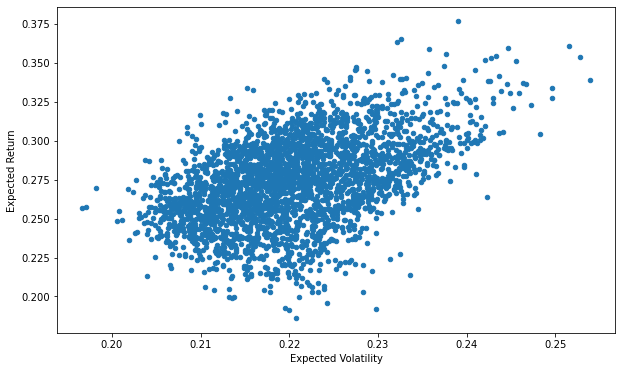

In [51]:
# check the plot
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [52]:
# #generate path and name then export
# path = 'results/'
# name = '_'.join(assets) + '.csv'
# path_name = path + name 
# portfolios.sort_values(by=['Volatility']).to_csv(path_name)

In [53]:
# calculation
print("money amount calculation for demo use only, please don't simply invest on this results alone.")

sorted_portfolios = portfolios.sort_values(by=['Volatility']).head(1)

total_investment = 25000
print("Intend to invest ${:.2f}".format(total_investment) + " total.")

for i in range(num_assets):
    inv = total_investment * sorted_portfolios[assets[i]].iloc[0]
    print("\tinvest in " + assets[i] + " for ${:.2f}".format(inv) + ".")

print("Expected annual portfolio return is {:.1f}".format(sorted_portfolios['Return'].iloc[0]*100) + "%")
print("Expected annual portfolio volatility is {:.1f}".format(sorted_portfolios['Volatility'].iloc[0]*100) + "%")

money amount calculation for demo use only, please don't simply invest on this results alone.
Intend to invest $25000.00 total.
	invest in COST for $9965.33.
	invest in VUG for $1338.70.
	invest in VOO for $954.45.
	invest in CMCSA for $417.80.
	invest in AAPL for $44.74.
	invest in VTI for $4354.00.
	invest in VYM for $7924.99.
Expected annual portfolio return is 25.7%
Expected annual portfolio volatility is 19.7%


# above is the expected return using 3-year data
# below is the actual return using 1 year data.

In [54]:
pf_data_actual = pd.DataFrame()
invested_weights = []

for i in range(num_assets):
    invested_weights.append(sorted_portfolios[assets[i]].iloc[0])
invested_weights = np.array(invested_weights)

for a in assets:
    pf_data_actual[a] = wb.DataReader(a, data_source = 'yahoo', start = '2021-1-1', end = '2022-1-1')['Adj Close'] 

log_returns_actual = np.log(pf_data_actual / pf_data_actual.shift(1))   #compute actual daily log return for all stocks

#get actual portfolio return
print("Actual annual portfolio return is {:.1f}".format(np.sum(invested_weights * log_returns_actual.mean()) * 250 *100) + "%")
#get actual portfolio volatility
print("Actual annual portfolio volatility is {:.1f}".format(np.sqrt(np.dot(invested_weights.T,np.dot(log_returns_actual.cov() * 250, invested_weights)))*100) +"%")


Actual annual portfolio return is 30.6%
Actual annual portfolio volatility is 12.6%
